# Detection of Covid-19 from Chest-X-ray

In [3]:
# Import the required modules
import numpy as np
import pandas as pd
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
# pip install keras_preprocessing

# Data ingesting of Covid 19 images

## COVID and Normal dataset directory
## Method No 1: Using Kaggle

In [5]:
#install kaggle
! pip install kaggle

In [8]:
! kaggle datasets download alifrahman/covid19-chest-xray-image-dataset

Dataset URL: https://www.kaggle.com/datasets/alifrahman/covid19-chest-xray-image-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 76% 31.0M/40.6M [00:00<00:00, 105MB/s] 
100% 40.6M/40.6M [00:00<00:00, 106MB/s]


In [9]:
! mkdir train

In [10]:
! unzip /content/covid19-chest-xray-image-dataset.zip

Archive:  /content/covid19-chest-xray-image-dataset.zip
  inflating: dataset/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: dataset/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: dataset/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: dataset/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: dataset/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: dataset/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: dataset/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: dataset/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.png  
  inflating: dataset/covid/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg  
  inflating: dataset/covid

In [11]:
BASIS_DIR = '/content/dataset'
CLASSES = ["covid",  "normal"]

## Method No 2: Data ingest using Google Drive

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
BASIS_DIR = '/content/drive/MyDrive/dataset '
CLASSES = ["covid",  "normal"]

# Method No 3: Data ingest using Direct method

In [17]:
BASIS_DIR = '/content/sample_data/dataset method 3'
CLASSES = ["covid",  "normal"]

# Method No 4: Data ingest using Local on-premises

In [ ]:
# COVID and Normal dataset directory
BASIS_DIR = 'D:/DataSet/COVID_CHEST_XRAY'
classes=["COVID_",  "Normal_"]

# Image augmentation process:

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode = 'nearest',

    #split dataset to training(80%) and validation(20%):
    validation_split=0.2
)

# Training dataset and Validation dataset:

In [19]:
train_data = train_datagen.flow_from_directory(
    directory=BASIS_DIR,
    target_size=(299, 299),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='training',
    classes=CLASSES
    )

Found 24 images belonging to 2 classes.


In [20]:
val_data = train_datagen.flow_from_directory(
    directory=BASIS_DIR,
    target_size=(299, 299),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='validation',
    classes=CLASSES
    )

Found 4 images belonging to 2 classes.


# Using sequential model:

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(299, 299, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 297, 297, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,297,057 (16.39 MB)

 Trainable params: 4,297,057 (16.39 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# (filter_height*filter_width*number_of_channels+1)*number_of_filters
(3*3*32+1)*32

9248

In [24]:
# Compiling model with 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy']
             )

In [26]:
# Training process:
number_epochs = 3
# You can change number_epochs above. But the bigger the value, the more time it takes for training
history = model.fit(train_data, epochs=number_epochs,
                    validation_data=val_data, verbose=2)

Epoch 1/3
1/1 - 7s - 7s/step - accuracy: 0.5000 - loss: 0.8051 - val_accuracy: 0.5000 - val_loss: 0.6782
Epoch 2/3
1/1 - 4s - 4s/step - accuracy: 0.5833 - loss: 0.6839 - val_accuracy: 0.5000 - val_loss: 0.6802
Epoch 3/3
1/1 - 4s - 4s/step - accuracy: 0.6250 - loss: 0.6864 - val_accuracy: 0.5000 - val_loss: 0.6708


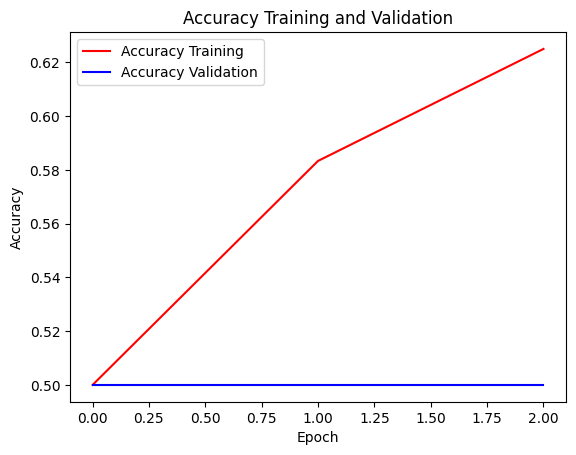

In [27]:
# Plotting training accuracy and validation accuracy
plt.plot(history.history['accuracy'], 'r', label='Accuracy Training')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy Validation')
plt.title('Accuracy Training and Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

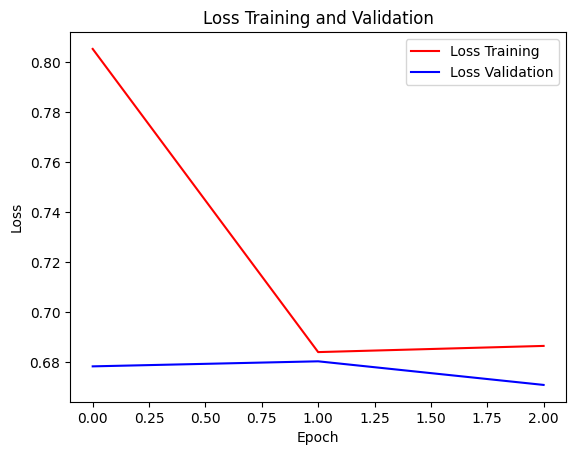

In [28]:
# Plotting training loss and validation loss
plt.plot(history.history['loss'], 'r', label='Loss Training')
plt.plot(history.history['val_loss'], 'b', label='Loss Validation')
plt.title('Loss Training and Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

In [29]:
import tensorflow as tf
from tensorflow.keras.models import save_model
# Save the compiled model to an H5 file
save_model(model, 'model.h5')

# Test random image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
COVID


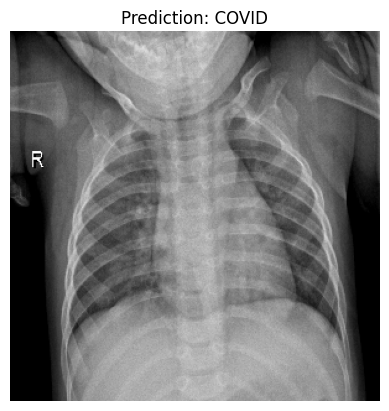

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Assuming you have a pre-trained model saved as 'your_model.h5'
model = load_model('model.h5')

path = "/content/dataset/normal/IM-0131-0001.jpeg"
img = image.load_img(path, target_size=(299, 299))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

result = model.predict(img_array)

# Assuming your model output has two classes (COVID and Normal)
threshold = 0.5
prediction = "COVID" if result[0][0] > threshold else "NORMAL"
print(prediction)

# Display the image
plt.imshow(img)
plt.title(f"Prediction: {prediction}")
plt.axis('off')  # Hide the axes
plt.show()
